In [1]:
### Importing the rquired packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inventorize as inv

In [2]:
### Reading data into Dataframe
df = pd.read_csv('twentyeleven.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [4]:
#Droping duplicates and empty rows
df = df.drop_duplicates()
df = df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      367058 non-null  float64
 1   StockCode    367058 non-null  object 
 2   Description  367058 non-null  object 
 3   Quantity     367058 non-null  int64  
 4   InvoiceDate  367058 non-null  object 
 5   Price        367058 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      367058 non-null  object 
 8   date         367058 non-null  object 
 9   revenue      367058 non-null  float64
 10  year         367058 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 33.6+ MB


In [5]:
## Aggregating the data by total sales and total revenue
df_group = df.groupby('Description').agg(total_sales=('Quantity','sum'),total_revenue=('revenue','sum')).reset_index()
df_group

,Description,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,5720,4744.22
1,12 COLOURED PARTY BALLOONS,2041,1328.45
2,12 DAISY PEGS IN WOOD BOX,312,514.80
3,12 EGG HOUSE PAINTED WOOD,109,1399.77
4,12 HANGING EGGS HAND PAINTED,40,83.20
...,...,...,...
3767,ZINC T-LIGHT HOLDER STARS SMALL,4894,3879.98
3768,ZINC TOP 2 DOOR WOODEN SHELF,9,152.55
3769,ZINC WILLIE WINKIE CANDLE STICK,2432,2028.20
3770,ZINC WIRE KITCHEN ORGANISER,25,156.80


######  Product Category Using ABC analysis

In [6]:
a = inv.ABC(df_group[['Description','total_sales']])
a

,Description,total_sales,Percentage,comulative,Category
3684,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49180,1.046469e-02,0.010465,A
1697,JUMBO BAG RED RETROSPOT,44022,9.367152e-03,0.019832,A
3597,WHITE HANGING HEART T-LIGHT HOLDER,33095,7.042068e-03,0.026874,A
204,ASSORTED COLOUR BIRD ORNAMENT,33004,7.022704e-03,0.033897,A
2519,POPCORN HOLDER,30919,6.579051e-03,0.040476,A
...,...,...,...,...,...
2863,SET 36 COLOURING PENCILS DOILEY,1,2.127834e-07,0.999999,C
3451,VINTAGE BEAD PINK JEWEL STAND,1,2.127834e-07,0.999999,C
1176,FIRE POLISHED GLASS BRACELET BLACK,1,2.127834e-07,1.000000,C
1615,I LOVE LONDON MINI RUCKSACK,1,2.127834e-07,1.000000,C


#####  The items in category A are the highest volume drivers while C is the least Volume drivers

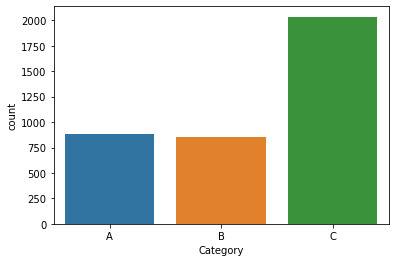

In [7]:
sns.countplot(x='Category',data=a);

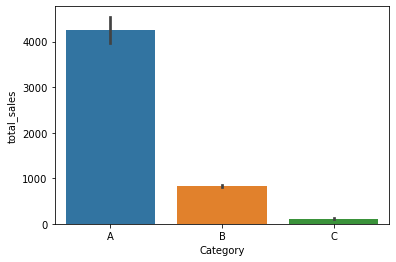

In [8]:
sns.barplot(x='Category',y='total_sales',data=a);

###### From the above plots, Items in category A has the least number of items but drives the highest sales

In [9]:
Product_mix = inv.productmix(df_group['Description'],df_group['total_sales'],df_group['total_revenue'])
Product_mix

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
2681,REGENCY CAKESTAND 3 TIER,10820,124683.250,2.302317e-03,0.193247,1.544801e-02,0.015448,A,A,A_A
3597,WHITE HANGING HEART T-LIGHT HOLDER,33095,90790.050,7.042068e-03,0.026874,1.124871e-02,0.026697,A,A,A_A
1697,JUMBO BAG RED RETROSPOT,44022,81421.340,9.367152e-03,0.019832,1.008795e-02,0.036785,A,A,A_A
2530,POSTAGE,2901,73391.960,6.172847e-04,0.600097,9.093122e-03,0.045878,A,A,A_A
2274,PARTY BUNTING,15093,67991.730,3.211540e-03,0.112839,8.424044e-03,0.054302,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
1118,FAIRY CAKE NOTEBOOK A5 SIZE,1,0.850,2.127834e-07,0.999994,1.053134e-07,1.000000,C,C,C_C
2370,PINK CRYSTAL GUITAR PHONE CHARM,1,0.850,2.127834e-07,0.999995,1.053134e-07,1.000000,C,C,C_C
2844,SET 12 COLOURING PENCILS DOILEY,1,0.650,2.127834e-07,0.999996,8.053374e-08,1.000000,C,C,C_C
1566,HEN HOUSE W CHICK IN NEST,1,0.420,2.127834e-07,0.999993,5.203719e-08,1.000000,C,C,C_C


In [10]:
Product_mix.product_mix.value_counts()

C_C    1711
A_A     558
B_B     382
A_B     275
C_B     274
B_C     267
B_A     205
C_A      51
A_C      49
Name: product_mix, dtype: int64

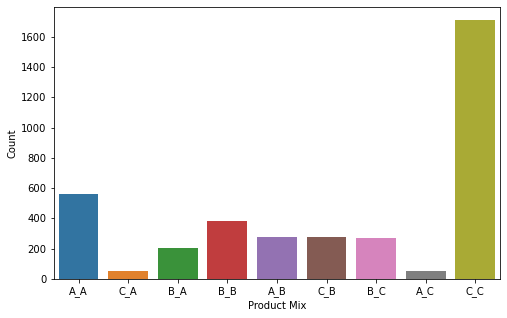

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='product_mix',data=Product_mix)
plt.ylabel("Count")
plt.xlabel("Product Mix")
plt.show()

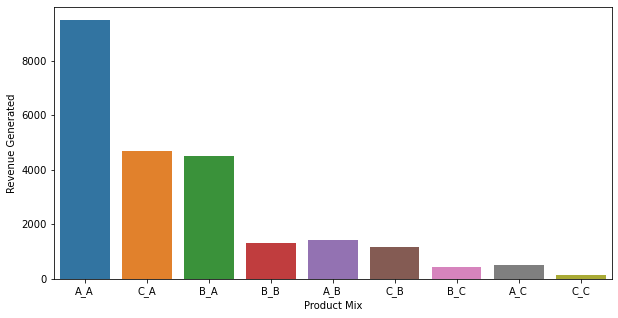

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='product_mix',y='revenue',data=Product_mix,ci=None)
plt.ylabel("Revenue Generated")
plt.xlabel("Product Mix")
plt.show()

In [13]:
df_group_country = df.groupby(['Description','Country']).agg(total_sales=('Quantity','sum'),
                                                               total_revenue=('revenue','sum')).reset_index()
df_group_country

,Description,Country,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,Australia,48,40.80
1,10 COLOUR SPACEBOY PEN,Canada,24,20.40
2,10 COLOUR SPACEBOY PEN,EIRE,192,163.20
3,10 COLOUR SPACEBOY PEN,France,312,265.20
4,10 COLOUR SPACEBOY PEN,Germany,264,224.40
...,...,...,...,...
18715,ZINC WILLIE WINKIE CANDLE STICK,United Kingdom,1832,1568.12
18716,ZINC WIRE KITCHEN ORGANISER,Portugal,1,10.40
18717,ZINC WIRE KITCHEN ORGANISER,United Kingdom,24,146.40
18718,ZINC WIRE SWEETHEART LETTER TRAY,EIRE,8,10.00


In [14]:
country_sales_revenue = df.groupby('Country').agg(Total_sales=('Quantity','sum'),
                                                               Total_revenue=('revenue','sum')).reset_index()
 

In [15]:
top_10_country_by_sales = country_sales_revenue.sort_values(by='Total_sales',ascending=False).head(10)
top_10_country_by_sales

,Country,Total_sales,Total_revenue
34,United Kingdom,3832250,6.542894e+06
22,Netherlands,194126,2.766619e+05
10,EIRE,135130,2.564486e+05
14,Germany,112290,2.134727e+05
13,France,106441,1.993360e+05
0,Australia,83742,1.374885e+05
30,Sweden,32124,3.453353e+04
31,Switzerland,29369,5.513903e+04
29,Spain,27077,5.971483e+04
19,Japan,21923,2.971130e+04


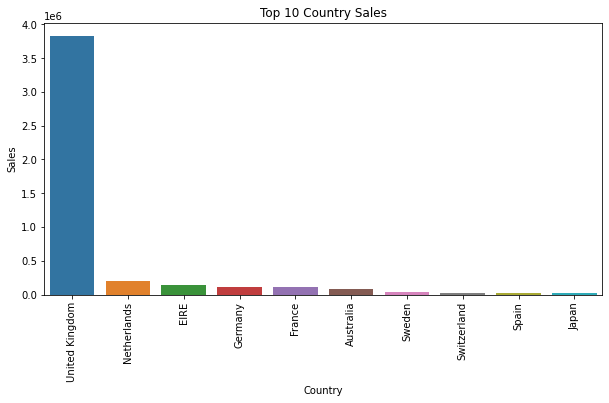

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country',y='Total_sales',data=top_10_country_by_sales,ci=None)
plt.ylabel("Sales")
plt.xlabel("Country")
plt.title("Top 10 Country Sales")
plt.xticks(rotation='vertical')
plt.show()

In [17]:
top_10_country_by_revenue = country_sales_revenue.sort_values(by='Total_revenue',ascending=False).head(10)
top_10_country_by_revenue

,Country,Total_sales,Total_revenue
34,United Kingdom,3832250,6.542894e+06
22,Netherlands,194126,2.766619e+05
10,EIRE,135130,2.564486e+05
14,Germany,112290,2.134727e+05
13,France,106441,1.993360e+05
0,Australia,83742,1.374885e+05
29,Spain,27077,5.971483e+04
31,Switzerland,29369,5.513903e+04
3,Belgium,21482,3.938643e+04
30,Sweden,32124,3.453353e+04


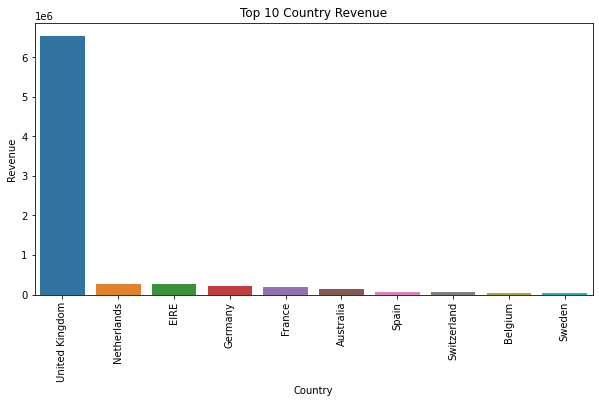

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country',y='Total_revenue',data=top_10_country_by_revenue,ci=None)
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.title("Top 10 Country Revenue")
plt.xticks(rotation='vertical')
plt.show()

In [19]:
coun_prdmix = inv.productmix_storelevel(df_group_country['Description'],df_group_country['total_sales'],
                                       df_group_country['total_revenue'],df_group_country['Country'])
coun_prdmix.head()

C:\Users\Amos Ogunleye\anaconda3\lib\site-packages\inventorize\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
12069,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.022498,0.057749,0.024554,0.024554,A,A,A_A
14949,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.007165,0.170619,0.015143,0.039697,A,A,A_A
12880,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20,Australia,0.016049,0.094146,0.014454,0.054150,A,A,A_A
14385,SET OF 3 CAKE TINS PANTRY DESIGN,464,1983.20,Australia,0.005541,0.221657,0.014424,0.068575,A,A,A_A
12936,REGENCY CAKESTAND 3 TIER,180,1978.20,Australia,0.002149,0.684734,0.014388,0.082963,A,A,A_A


In [20]:
ire = coun_prdmix[coun_prdmix['storeofsku']=='EIRE']
ire.tail()

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
13629,ROUND PURPLE CLOCK WITH SUCKER,10,1.90,EIRE,0.000074,0.984237,0.000007,0.999974,C,C,C_C
8838,MAGIC DRAWING SLATE BAKE A CAKE,4,1.68,EIRE,0.000030,0.997543,0.000007,0.999980,C,C,C_C
8842,MAGIC DRAWING SLATE BUNNIES,4,1.68,EIRE,0.000030,0.998402,0.000007,0.999987,C,C,C_C
8873,MAGIC DRAWING SLATE LEAP FROG,4,1.68,EIRE,0.000030,0.998254,0.000007,0.999993,C,C,C_C
8862,MAGIC DRAWING SLATE DOLLY GIRL,4,1.68,EIRE,0.000030,0.998372,0.000007,1.000000,C,C,C_C


In [21]:
ire.product_mix.value_counts()

C_C    571
A_A    332
B_B    329
B_C    212
C_B    204
A_B    143
B_A     94
A_C     37
C_A     23
Name: product_mix, dtype: int64

In [22]:
coun = coun_prdmix.groupby(['storeofsku','product_mix']).count().reset_index()
coun

,storeofsku,product_mix,sku,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category
0,Australia,A_A,149,149,149,149,149,149,149,149,149
1,Australia,A_B,63,63,63,63,63,63,63,63,63
2,Australia,A_C,20,20,20,20,20,20,20,20,20
3,Australia,B_A,58,58,58,58,58,58,58,58,58
4,Australia,B_B,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...
306,Unspecified,B_B,16,16,16,16,16,16,16,16,16
307,Unspecified,B_C,4,4,4,4,4,4,4,4,4
308,Unspecified,C_A,10,10,10,10,10,10,10,10,10
309,Unspecified,C_B,14,14,14,14,14,14,14,14,14


### Time Series analysis and Customer recency Analysis

In [23]:
#Converting Invoice Date to date time data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['week'] = df['InvoiceDate'].dt.week
df['dayofweek'] = df['InvoiceDate'].dt.dayofweek
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['month_year'] = df['InvoiceDate'].dt.strftime('%B-%Y')
df['day_name'] = df['InvoiceDate'].dt.strftime('%A')
df.tail()

<ipython-input-23-62bc6f780ab2>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['InvoiceDate'].dt.week


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,week,dayofweek,month,month_year,day_name
484325,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00+00:00,2.10,12680.0,France,2011-12-09,12.60,2011,49,4,12,December-2011,Friday
484326,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,49,4,12,December-2011,Friday
484327,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,49,4,12,December-2011,Friday
484328,581587.0,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00+00:00,4.95,12680.0,France,2011-12-09,14.85,2011,49,4,12,December-2011,Friday
484329,581587.0,POST,POSTAGE,1,2011-12-09 12:50:00+00:00,18.00,12680.0,France,2011-12-09,18.00,2011,49,4,12,December-2011,Friday


In [24]:
df.day_name.value_counts()

Thursday     73578
Wednesday    62743
Tuesday      62658
Monday       60254
Sunday       56757
Friday       51068
Name: day_name, dtype: int64

In [25]:
## Getting the last purchase date for each Customer
df['date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])
max_date = df['date'].max()
customer_last = df.groupby('Customer ID').agg(last_purchase_date=('date','max')).reset_index()
customer_last

,Customer ID,last_purchase_date
0,12347.0,2011-12-07
1,12348.0,2011-09-25
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03
...,...,...
4214,18280.0,2011-03-07
4215,18281.0,2011-06-12
4216,18282.0,2011-12-02
4217,18283.0,2011-12-06


In [26]:
## To get the number of days after the last visit of Customer
customer_last['recency'] = max_date - customer_last['last_purchase_date']
customer_last.head()

,Customer ID,last_purchase_date,recency
0,12347.0,2011-12-07,2 days
1,12348.0,2011-09-25,75 days
2,12349.0,2011-11-21,18 days
3,12350.0,2011-02-02,310 days
4,12352.0,2011-11-03,36 days


In [27]:
## changing recency to integers
customer_last['recency'] = customer_last['recency'].astype('string').str.replace('days','')
customer_last['recency'] = pd.to_numeric(customer_last['recency'],errors='coerce')
customer_last.head()

,Customer ID,last_purchase_date,recency
0,12347.0,2011-12-07,2
1,12348.0,2011-09-25,75
2,12349.0,2011-11-21,18
3,12350.0,2011-02-02,310
4,12352.0,2011-11-03,36


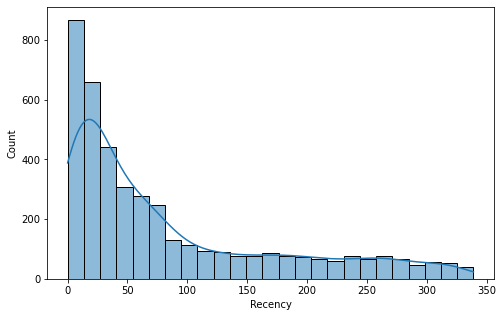

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(x='recency',data=customer_last,kde=True)
plt.ylabel("Count")
plt.xlabel("Recency")
plt.show()

#### Majority of the recency data fall withinh the last one month, but there are customers who stop coming more than 6 months ago

In [29]:
daily_sales = df.groupby('date').agg(total_daily_sales=('Quantity','sum'))
daily_sales.head()

,total_daily_sales
date,
2011-01-04,6950
2011-01-05,18369
2011-01-06,21582
2011-01-07,15122
2011-01-09,8125


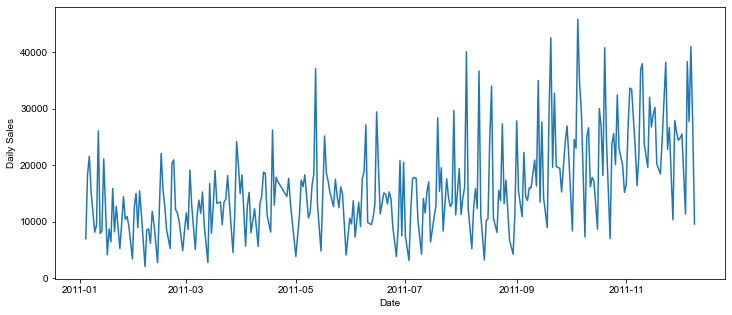

In [30]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date', y ='total_daily_sales',data=daily_sales)
plt.ylabel("Daily Sales")
plt.xlabel("Date")
sns.set_style("dark")
plt.show()

In [31]:
## Moving average sales
daily_sales['moving_7'] = daily_sales.rolling(window=7).mean()
daily_sales['moving_14'] = daily_sales.total_daily_sales.rolling(window=14).mean()
daily_sales

,total_daily_sales,moving_7,moving_14
date,,,
2011-01-04,6950,NaN,NaN
2011-01-05,18369,NaN,NaN
2011-01-06,21582,NaN,NaN
2011-01-07,15122,NaN,NaN
2011-01-09,8125,NaN,NaN
...,...,...,...
2011-12-05,38347,25463.285714,25062.785714
2011-12-06,27736,25435.285714,25725.571429
2011-12-07,41011,27596.000000,26905.285714


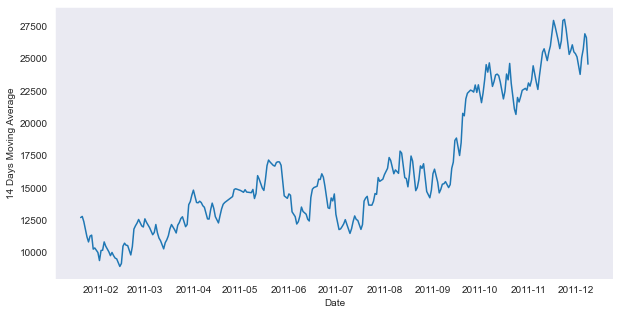

In [32]:
plt.figure(figsize =(10,5))
sns.lineplot(x='date', y ='moving_14',data=daily_sales)
plt.ylabel("14 Days Moving Average")
plt.xlabel("Date")
sns.set_style("dark")
plt.show()

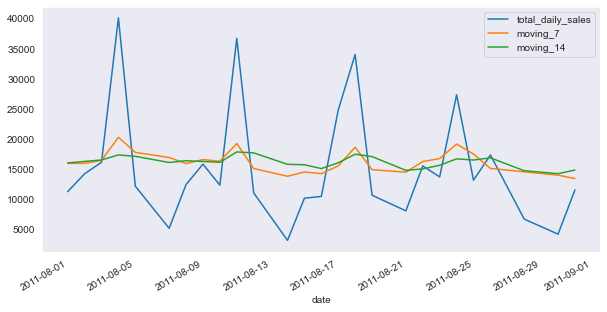

In [33]:
daily_sales['Aug-2011'].plot(figsize=(10,5));

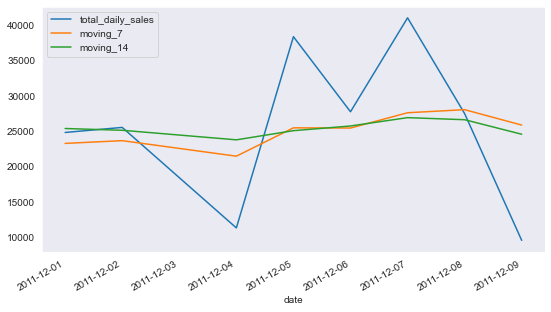

In [34]:
daily_sales['Dec-2011'].plot(figsize=(9,5));

<AxesSubplot:xlabel='date'>

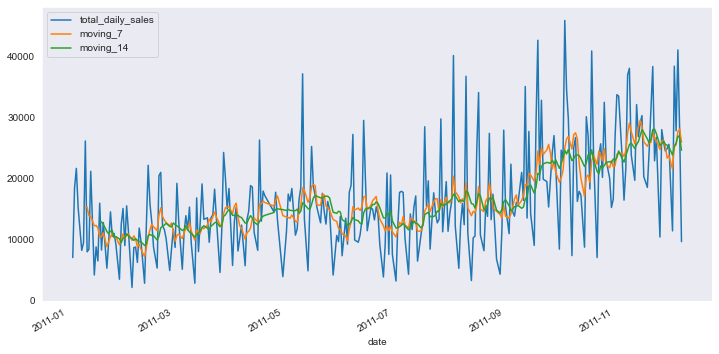

In [35]:
daily_sales.plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

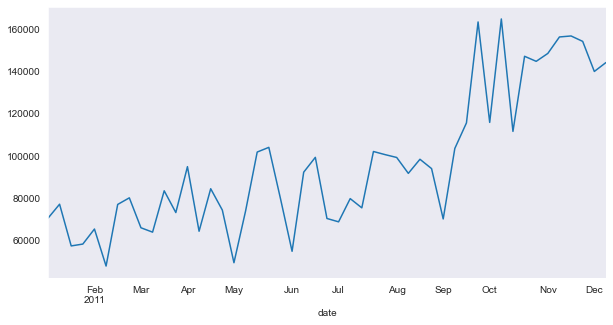

In [36]:
week_resamples = daily_sales.total_daily_sales.resample('w').sum()
week_resamples.plot(figsize=(10,5))

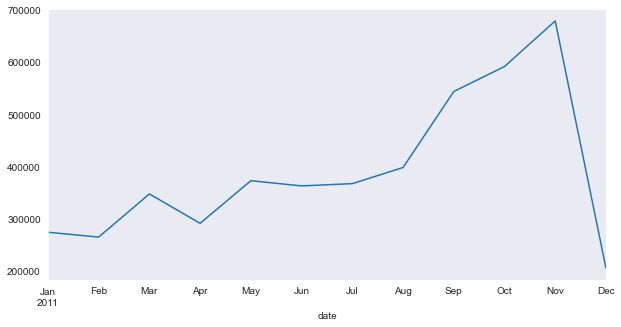

In [37]:
month_resamples = daily_sales.total_daily_sales.resample('m').sum()
month_resamples.plot(figsize=(10,5));